In [1]:
#Data Preprocessing:
    #Images are stored with the name of the animal and the image id
    #<nameofanimal>.<imageid>
    #create a folder called train_images
    #inside the train_images folder,create two folders called dogs and cats
    #METHOD 1 DOGS/CATS FOLDER
    #from train folder gather the images, and place them into dogs and cats folder
    #METHOD 2 CSV FILE

In [2]:
import tensorflow as tf
import os
import shutil

In [18]:
#create the train_images file
#create the leaf files called dogs and cat inside the parent folder (train_images)
parent_dir = 'train_images'
try:
    os.makedirs(os.path.join(parent_dir,'dogs'))
    os.makedirs(os.path.join(parent_dir,'cats'))
    print('files created')
except FileExistsError:
    print('files already exists')


files already exists


In [4]:
#sort the images from the train which is a collection of dogs and cat images
#sort them into the newly created files called dogs and cats
def copy_images_over(str):
    image_size = 0
    for path in os.listdir('train'):
        if path.find(str) != -1:
            shutil.copy(os.path.join('train',path),os.path.join('train_images', str + 's'))
            image_size += 1
    return image_size

dogs = copy_images_over('dog')
cats = copy_images_over('cat')
print(f'Copied {dogs} images of dogs and Copied {cats} images of cats')

Copied 12500 images of dogs and Copied 12500 images of cats


In [4]:
#load dataset
import numpy as np
import matplotlib.pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('train_images')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 25000 files belonging to 2 classes.


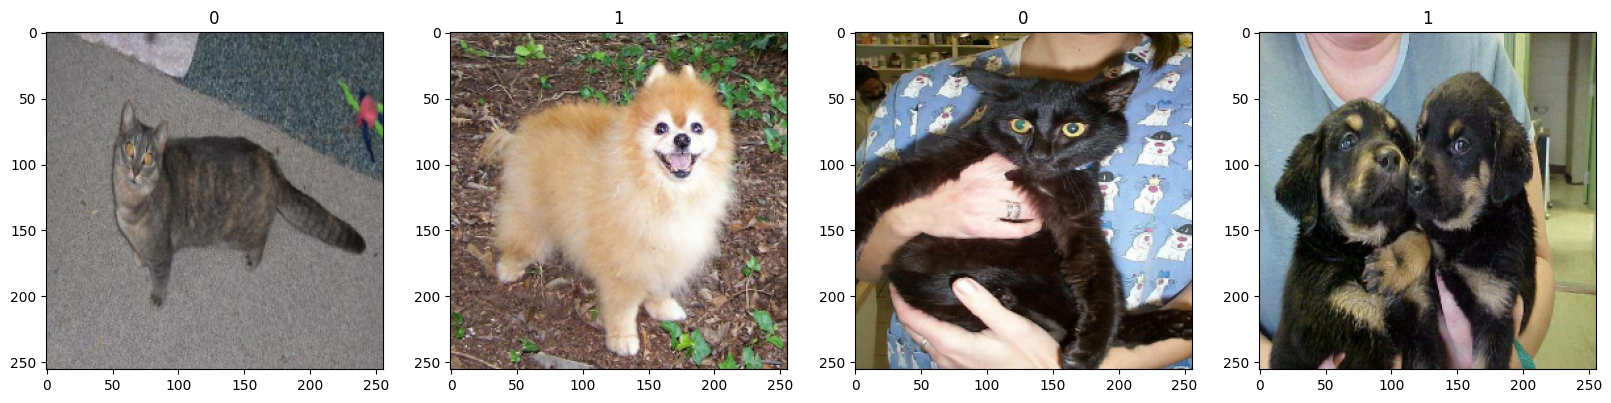

In [5]:
#illustrates the images from the batch, shows the classes
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
#data preprocessing
#scale the data
data = data.map(lambda x,y: (x/255, y))


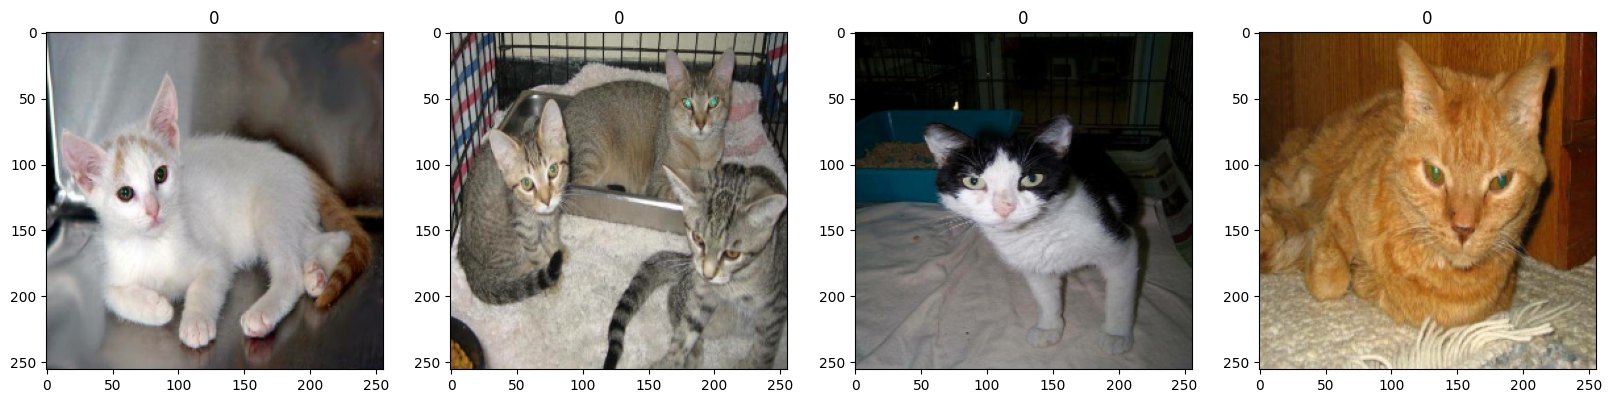

In [7]:
batch = data.as_numpy_iterator().next()

fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [8]:
len(data)

782

In [9]:
#split data 70% 20% 10%
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [10]:
test_size

78

In [11]:
#Data is now split into train,val, and test sets
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [12]:
len(test)

78

In [13]:
#model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1 , activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [14]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
os.mkdir('logs')

In [17]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
history = model.fit(train, epochs=20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
547/547 [==============================] - 216s 393ms/step - loss: 0.6549 - accuracy: 0.6173 - val_loss: 0.6237 - val_accuracy: 0.6783
Epoch 2/20
547/547 [==============================] - 207s 379ms/step - loss: 0.5524 - accuracy: 0.7168 - val_loss: 0.5225 - val_accuracy: 0.7379
Epoch 3/20
547/547 [==============================] - 211s 385ms/step - loss: 0.4368 - accuracy: 0.7954 - val_loss: 0.5236 - val_accuracy: 0.7462
Epoch 4/20
547/547 [==============================] - 210s 383ms/step - loss: 0.2955 - accuracy: 0.8735 - val_loss: 0.6150 - val_accuracy: 0.7373
Epoch 5/20
547/547 [==============================] - 209s 381ms/step - loss: 0.1452 - accuracy: 0.9437 - val_loss: 0.7206 - val_accuracy: 0.7576
Epoch 6/20
547/547 [==============================] - 211s 385ms/step - loss: 0.0692 - accuracy: 0.9765 - val_loss: 1.0630 - val_accuracy: 0.7518
Epoch 7/20
547/547 [==============================] - 209s 382ms/step - loss: 0.0495 - accuracy: 0.9838 - val_loss: 1.1590 -

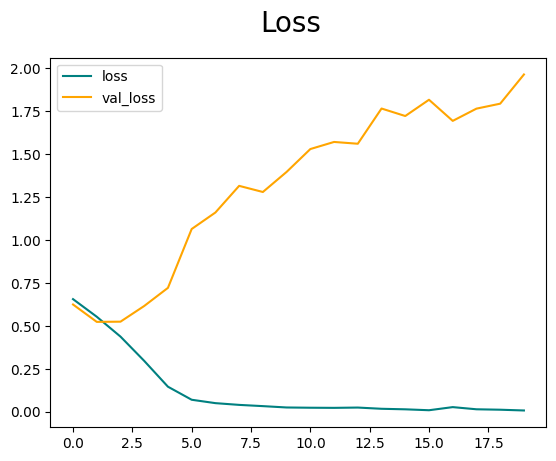

In [24]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()


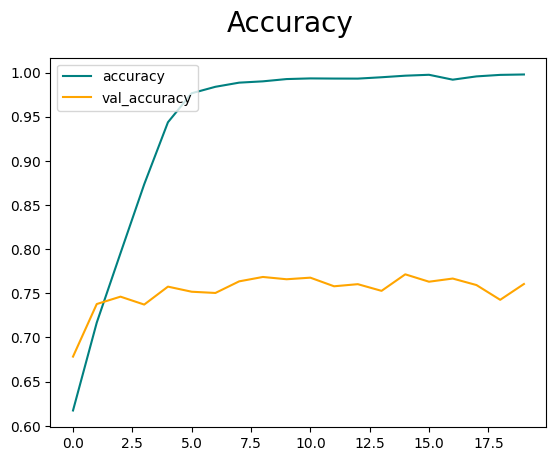

In [25]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

precision = Precision()
recall = Recall()
binary_accuracy = BinaryAccuracy()



In [33]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    binary_accuracy.update_state(y,yhat)

print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Binary Accuracy:{binary_accuracy.result().numpy()}')

1/1 [==============================] - 0s 171ms/step
Precision:0.7516718506813049, Recall:0.7081058621406555, Binary Accuracy:0.7467637658119202


In [37]:
import cv2

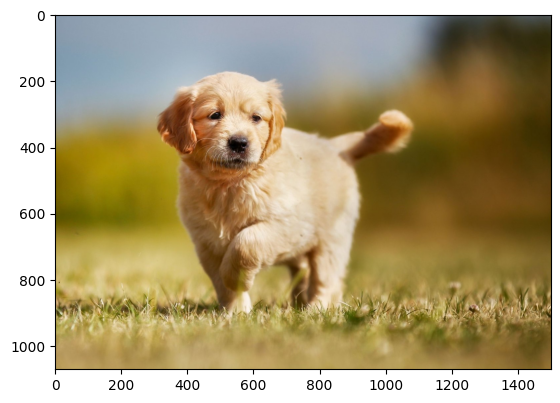

In [54]:
img = cv2.imread("Golden Retriever.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

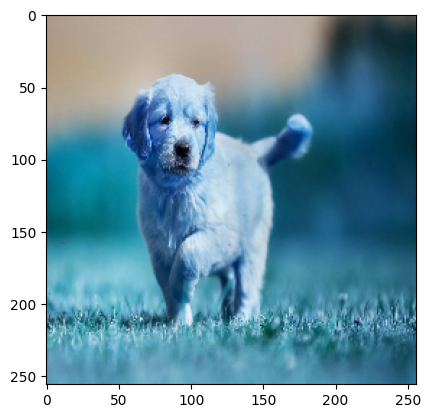

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 165ms/step


array([[0.99998057]], dtype=float32)

In [57]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models', 'DogsVsCats_v1.h5'))
